In [12]:
#Import python libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#import the csv file containing mall data about customers and their spending habit
file_path = os.path.join(os.path.pardir, 'data', 'processed')
mall_file_path = os.path.join(file_path, 'Mall_Customers.csv')


In [19]:
mall_df = pd.read_csv(mall_file_path)

In [20]:
mall_df.info


<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Fe

In [21]:
X = mall_df.iloc[:, [3, 4]].values

In [34]:
#Use Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

#CReate an empty list for sum of square errors for various choice number of clusters
sum_of_square_errors = []

#TEsting with clusters from 1 to 25
for i in range(1,26):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    sum_of_square_errors.append(kmeans.inertia_)
    
print(sum_of_square_errors)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25095.703209997548, 21830.041978049434, 20736.679938924124, 17702.595932296277, 15810.838613705502, 14763.330402558204, 13165.329070181624, 12064.93900069229, 10788.847033763337, 10585.021275946276, 9071.935658374023, 8566.599192715497, 8107.899230399231, 7695.754834054835, 7128.290476190476, 6887.403157807105, 6440.711577204373, 6245.773729048729]


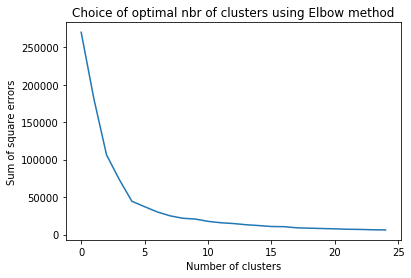

In [33]:
#PLot sum of square errors vs number of clusters using matplotlib.plt
plt.title('Choice of optimal nbr of clusters using Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square errors')
plt.plot(sum_of_square_errors)
plt.show()

In [36]:
#FRom the above graph, number of clusters = 5 is a optimum value 
#Fit the dataset X into K-Means algorithm for 5 clusters. Each customer will be assigned to a cluster
#from 0 to 4. Store clustering prediction as generated by kmeans into y_kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

#Print the values of y_kmeans. A customer can belong to any of the 5 clusters => 0/1/2/3/4.
print(y_kmeans)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [48]:
print(y_kmeans == 4,1)

[ True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

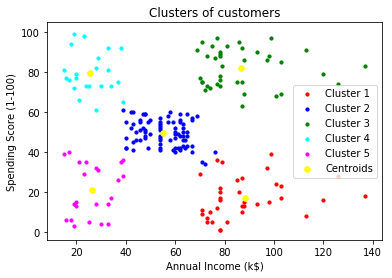

In [37]:

# Visualize the customers as datapoints segregated into 5 clusters with scatter plots, using different colors

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

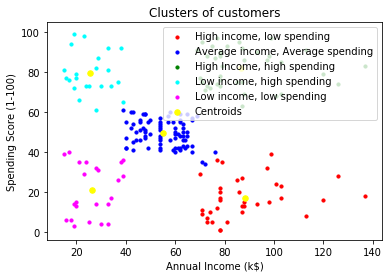

In [49]:
#Analyse the above graph for 5 distinct categories of customers. Now change the labels accordingly.
#Customers in high income-high spending cluster should be targetted for marketing campaign.
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'High income, low spending')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Average income, Average spending')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'High Income, high spending')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Low income, high spending')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Low income, low spending')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()